In [11]:
from pip._internal.utils import datetime

from automata4cps import examples
from automata4cps import learn
from automata4cps import tools
import pandas as pd
discrete_data, timestamp_col, discrete_vars = examples.conveyor_system_sfowl("discrete")
discrete_data[0].head()


#pd.to_datetime(discrete_data[0].timestamp, unit='s')

,timestamp,O_w_BLO_Axis_Ctrl,O_w_BHL_Axis_Ctrl,O_w_BHR_Axis_Ctrl,O_w_BRU_Axis_Ctrl,O_w_HAR_Ctrl,O_w_HAL_Ctrl
0,6.360150e+10,0,0,0,3,2048,2048
1,6.360150e+10,0,0,0,3,2048,2048
2,6.360150e+10,0,0,0,3,2048,2048
3,6.360150e+10,0,0,0,3,2048,2048
4,6.360150e+10,0,0,0,3,2048,2048


In [26]:
import datetime

# Current timestamp
current_timestamp = datetime.datetime.utcnow()
# Given timestamp
given_timestamp = datetime.timedelta(seconds=63601502741.166)

# Calculate the timestamp before the given number of seconds
previous_date = current_timestamp - given_timestamp

# Print the previous date
print("The day before the given timestamp was:", previous_date)

The day before the given timestamp was: 0008-09-08 00:54:48.575103


# Visualizing simple automaton

Sequence #1
Duration: 978.8280029296875
Sequence #2
Duration: 2128.5650024414062
Remove rare transitions


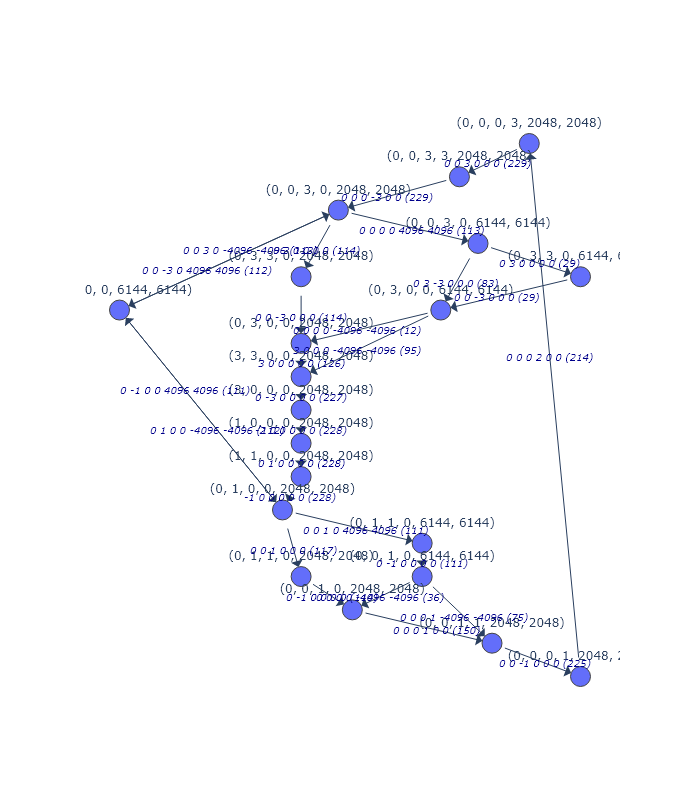

In [3]:
discrete_data_changes = tools.remove_timestamps_without_change(discrete_data, sig_names=discrete_vars)
ta = learn.simple_learn_from_signal_vectors(discrete_data_changes, sig_names=discrete_vars)
ta.remove_rare_transitions(min_num=10)
fig = ta.view_plotly(show_num_occur=True).show("png", height=800)

# Learning PTA from discrete variables

In [4]:
discr_data_events = tools.create_events_from_signal_vectors(discrete_data_changes, sig_names=discrete_vars)
discr_data_events = tools.split_data_on_signal_value(discr_data_events, "O_w_BRU_Axis_Ctrl", 3)
print("Number of sequences: ", len(discr_data_events))
discr_data_events[0].head()

Number of sequences:  230


,timestamp,O_w_BLO_Axis_Ctrl,O_w_BHL_Axis_Ctrl,O_w_BHR_Axis_Ctrl,O_w_BRU_Axis_Ctrl,O_w_HAR_Ctrl,O_w_HAL_Ctrl,event,splitting_group
0,6.360150e+10,0,0,0,3,2048,2048,nan nan nan nan nan nan,1
17,6.360150e+10,0,0,3,3,2048,2048,0 0 3 0 0 0,1
27,6.360150e+10,0,0,3,0,2048,2048,0 0 0 -3 0 0,1
35,6.360150e+10,0,0,0,0,6144,6144,0 0 -3 0 4096 4096,1
49,6.360150e+10,0,0,3,0,2048,2048,0 0 3 0 -4096 -4096,1


Automaton:
    Number of states: 404
    Number of transitions: 403


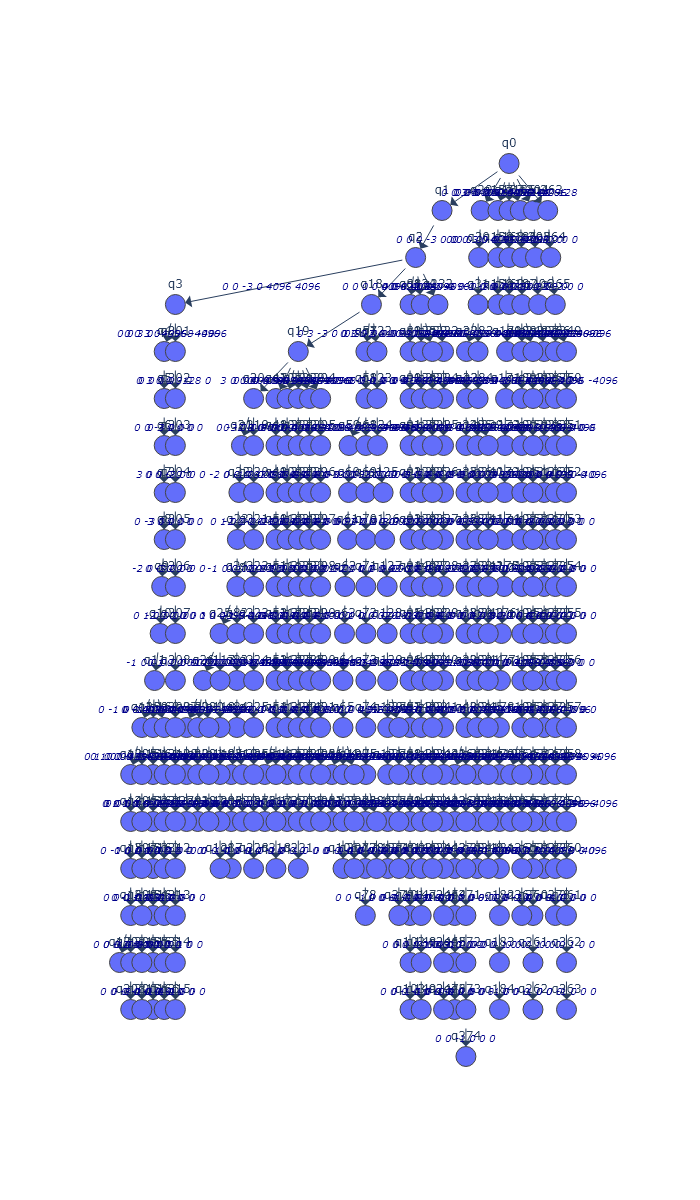

In [5]:
pta = learn.build_pta(discr_data_events)
print(pta)
pta.view_plotly().show("png", height=1200)